<a href="https://colab.research.google.com/github/preritt/Embed/blob/master/Complete_of_04182019_Satim_FullDatasetADAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import tensorflow as tf

In [0]:
# Load data
train_data = np.load('X_train.npy')
train_label = np.load('y_train.npy')
validation_data = np.load('X_validation.npy')
validation_label = np.load('y_validation.npy')
test_data = np.load('X_test.npy')
test_label = np.load('y_test.npy')

In [0]:
# Visualize data
train_data_pandas = pd.DataFrame(train_data)
train_data_labels = pd.DataFrame(train_label)
train_data_pandas.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0000,0.127273,-0.095238,-0.289256,0.032258,0.054545,-0.157895,-0.265625,-0.2500,-0.106796,...,-0.517241,-0.600000,-0.138462,-0.188119,-0.431579,-0.546875,-0.15625,-0.126214,-0.431579,-0.484375
1,0.0000,-0.090909,-0.571429,-0.603306,-0.096774,-0.090909,-0.494737,-0.562500,-0.2500,-0.106796,...,-0.517241,-0.600000,-0.015385,-0.049505,-0.431579,-0.609375,-0.15625,-0.126214,-0.494737,-0.609375
2,0.5625,0.490909,0.333333,-0.074380,0.354839,0.327273,0.052632,-0.187500,0.1875,0.242718,...,0.103448,-0.233333,0.200000,0.207921,-0.010526,-0.312500,-0.15625,0.009709,-0.326316,-0.437500
3,0.0000,-0.018182,-0.380952,-0.471074,-0.225806,-0.163636,-0.410526,-0.437500,-0.3750,-0.242718,...,-0.011494,-0.383333,-0.138462,-0.049505,-0.347368,-0.484375,0.09375,0.087379,-0.031579,-0.218750
4,0.0000,-0.018182,-0.285714,-0.471074,0.032258,-0.090909,-0.326316,-0.500000,-0.1250,-0.184466,...,0.287356,-0.183333,0.230769,0.267327,-0.031579,-0.281250,-0.03125,-0.126214,-0.431579,-0.546875


In [0]:
train_data_labels.head()

,0
0,5
1,5
2,5
3,5
4,5


In [0]:
test_data.shape

(2000, 36)

In [0]:
validation_data.shape

(1331, 36)

#### Combine Validation and train data for MLP classifier - and set validation fraction to 4500/15000 = 0.3

In [0]:
train_valid_combined = np.concatenate((train_data, validation_data))
train_valid_combined.shape

(4435, 36)

In [0]:
train_valid_label = np.concatenate((train_label, validation_label))


#### Fit MLP Classifier

In [0]:
# clf = MLPClassifier(hidden_layer_sizes=(104),validation_fraction=0.3)
# clf.fit(train_data, train_label)

In [0]:
clf =MLPClassifier(hidden_layer_sizes=(90, ), max_iter=200, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.1)

# Test set score: 0.950119

# clf.fit(train_valid_combined, train_valid_label)
clf.fit(train_data, train_label)

Iteration 1, loss = 0.95444174
Iteration 2, loss = 0.41361696
Iteration 3, loss = 0.37376292
Iteration 4, loss = 0.35310299
Iteration 5, loss = 0.33669458
Iteration 6, loss = 0.32397037
Iteration 7, loss = 0.31519296
Iteration 8, loss = 0.30943933
Iteration 9, loss = 0.30110286
Iteration 10, loss = 0.29639559
Iteration 11, loss = 0.29181714
Iteration 12, loss = 0.28519907
Iteration 13, loss = 0.27945018
Iteration 14, loss = 0.27446988
Iteration 15, loss = 0.27230486
Iteration 16, loss = 0.26854954
Iteration 17, loss = 0.26347512
Iteration 18, loss = 0.25999897
Iteration 19, loss = 0.25824005
Iteration 20, loss = 0.25456133
Iteration 21, loss = 0.24952501
Iteration 22, loss = 0.24607191
Iteration 23, loss = 0.24673228
Iteration 24, loss = 0.24442729
Iteration 25, loss = 0.24115307
Iteration 26, loss = 0.23827513
Iteration 27, loss = 0.23520357
Iteration 28, loss = 0.23354455
Iteration 29, loss = 0.22978524
Iteration 30, loss = 0.22810795
Iteration 31, loss = 0.22567502
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(90,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=1e-05,
       validation_fraction=0.1, verbose=10, warm_start=False)

#### Train Accuracy

In [0]:
clf.score(train_data,train_label)

0.9710051546391752

#### Validation Accuracy

In [0]:
clf.score(validation_data,validation_label)

0.8858001502629602

#### Test accuracy

In [0]:
clf.score(test_data,test_label)

0.898

#### Tensorflow model using weights initialized from numpy model

In [0]:
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)
enc.fit(train_label.reshape(1,-1).T)
train_label_one_hot = enc.transform(train_label.reshape(-1,1))
test_label_one_hot = enc.transform(test_label.reshape(-1,1))
validation_label_one_hot = enc.transform(validation_label.reshape(-1,1))
validation_test_label_one_hot = enc.transform(train_valid_label.reshape(-1,1))

In [0]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]
    
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [0]:
# hid_neuron = [90]

In [0]:
test_label_one_hot.shape

(2000, 6)

#### Base NN model in tensor flow

#### 36 -> 90 -> 6

## Train baseline model in tensorflow

In [0]:
#

In [0]:
train_data.shape

(3104, 36)

In [0]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev, seed=1000)

In [0]:
output_shape = train_label_one_hot.shape[1]

In [0]:
## Define weights of the layer

G_W1 = tf.Variable(np.float32(clf.coefs_[0]))
G_b1 = tf.Variable(np.float32(clf.intercepts_ [0]))

G_W2 =  tf.Variable(np.float32(clf.coefs_[1]))
G_b2 = tf.Variable(np.float32(clf.intercepts_ [1]))


saver = tf.train.Saver()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# tf.train.GradientDescentOptimizer

In [0]:
## Building the graph - Best!
saver = tf.train.Saver()
learning_rate = 0.001
hid_neuron = [374]
num_steps = 20000
batch_size = 200
train_losses = []
test_acc = []
X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
#     layer_2 = tf.matmul(layer_1, G_W2) + G_b2
#     layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    return out_layer

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X), labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X), 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

  ### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for step in range(0, num_steps):
        batch_x, batch_y = next_batch(batch_size, train_data, train_label_one_hot)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % 1000 == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
            print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
            train_losses.append(train_loss)
            validation_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
            if step%1000 == 0:
              print("Validation Accuracy {} ...".format(validation_accuracy))
              print()
              if (validation_accuracy >= best_accuracy_valid):
                best_accuracy_valid = validation_accuracy
                saver.save(sess, './statlog_letterAdam')
                test_Accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
    print("Test acc=",str(test_Accuracy), "%")
    print("Valid acc=",str(best_accuracy_valid), "%")

    print("="*50)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

step 0, training loss= 0.054217033, training acc= 98.00000190734863%
Validation Accuracy 88.58000946044922 ...

step 1000, training loss= 0.06791636, training acc= 98.00000190734863%
Validation Accuracy 88.80540466308594 ...

step 2000, training loss= 0.113990285, training acc= 94.9999988079071%
Validation Accuracy 88.88053894042969 ...

step 3000, training loss= 0.05273371, training acc= 98.00000190734863%
Validation Accuracy 88.65514373779297 ...

step 4000, training loss= 0.08585536, training acc= 98.50000143051147%
Validation Accuracy 88.80540466308594 ...

step 5000, training loss= 0.08647766, training acc= 97.50000238418579%
Validation Accuracy 88.73027801513672 ...

step 6000, training loss= 0.07679716, training acc= 98.50000143051147%
Validation Accuracy 88.73027801513672 ...

step 7000, tr

#### My model with feedback

## Divide valid in two parts for validation and validation-test¶

In [0]:
print(validation_data.shape)
print(train_data.shape)

(1331, 36)
(3104, 36)


In [0]:
valid_validation_data = validation_data[0:1000,:]
valid_validation_data_label = validation_label_one_hot[0:1000,:]
valid_test_data = validation_data[1000:,:]
valid_test_data_label = validation_label_one_hot[1000:,:]

In [0]:
output_shape = train_label_one_hot.shape[1]

In [0]:
## Define weights of the layer
G_W1 = tf.Variable(np.float32(clf.coefs_[0]))
G_b1 = tf.Variable(np.float32(clf.intercepts_ [0]))

G_W2 =  tf.Variable(np.float32(clf.coefs_[1]))
G_b2 = tf.Variable(np.float32(clf.intercepts_ [1]))

num_hidden_neurons = 90
GwLoop = tf.Variable(xavier_init([output_shape,num_hidden_neurons]))
G_bLoop = tf.Variable(tf.zeros(shape=[num_hidden_neurons]))

GwLoop2 = tf.Variable(xavier_init([num_hidden_neurons,num_hidden_neurons]))
G_bLoop2 = tf.Variable(tf.zeros(shape=[num_hidden_neurons]))

GLossW = tf.Variable(xavier_init([output_shape,output_shape]))
GLossb= tf.Variable(tf.zeros(shape=[output_shape]))
saver = tf.train.Saver()

## Best Tuned, Use W1 = 5, W2 =4, W3 = 0 from best validation accuracy found below

In [0]:
# keep aside 
aside_examples= 100
aside_valid_test = train_valid_combined[-aside_examples:]
aside_valid_test_label = validation_test_label_one_hot[-aside_examples:]
combined_train_valid = train_valid_combined[:train_valid_combined.shape[0]-aside_examples,:]
combined_train_valid_label = validation_test_label_one_hot[:train_valid_combined.shape[0]-aside_examples,:]

In [0]:
## Building the graph - Best!
saver = tf.train.Saver()
hid_neuron = [374]
num_steps = 5000
# batch_size = 200
batch_size = train_data.shape[0]
 
train_losses = []
test_acc = []
val_accuracy = []
train_accuracy = []


# for h in hid_neuron:
#     num_hidden_neurons=h
learning_rate = 0.001
plot_every = 1


X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]


wLoss1 = 6
wLoss2 = 2
wLoss3 = 0
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for step in range(0, num_steps):
        batch_x, batch_y = next_batch(batch_size, train_data, train_label_one_hot)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % plot_every == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
            train_accuracy.append(train_acc)
            print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
            train_losses.append(train_loss)
            validation_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
            val_accuracy.append(validation_accuracy)
            if step%plot_every == 0:
              print("Validation Accuracy {} ...".format(validation_accuracy))
              print()
              if (validation_accuracy >= best_accuracy_valid):
                best_accuracy_valid = validation_accuracy
                saver.save(sess, './statlog_letterAdam')
                G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
#                     test_Accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
#         print("Test acc=",str(test_Accuracy), "%")
    print("Valid acc=",str(best_accuracy_valid), "%")
    ValidAccuracy_Track.append(best_accuracy_valid)
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)

#     validation_test_accuracy = sess.run(accuracy*100, feed_dict={X: valid_test_data,Y:valid_test_data_label})
#     ValidAccuracy_Test_track.append(validation_test_accuracy)
#     print("Validation Accuracy Test {} ...".format(validation_test_accuracy))
    print("="*50)
    print("W1 = {} ...".format(wLoss1))
    print("W2 = {} ...".format(wLoss2))
    print("W3 = {} ...".format(wLoss3))

    print("*"*50)
    print("="*50)

step 0, training loss= 0.65273607, training acc= 96.9394326210022%
Validation Accuracy 88.65514373779297 ...

step 1, training loss= 0.44781587, training acc= 96.68170213699341%
Validation Accuracy 88.65514373779297 ...

step 2, training loss= 0.3298784, training acc= 96.35953903198242%
Validation Accuracy 88.88053894042969 ...

step 3, training loss= 0.2652131, training acc= 96.00515365600586%
Validation Accuracy 88.88053894042969 ...

step 4, training loss= 0.23919326, training acc= 95.55412530899048%
Validation Accuracy 89.03079986572266 ...

step 5, training loss= 0.23553881, training acc= 95.10309100151062%
Validation Accuracy 88.73027801513672 ...

step 6, training loss= 0.24323116, training acc= 94.68427896499634%
Validation Accuracy 88.5048828125 ...

step 7, training loss= 0.25434718, training acc= 94.65206265449524%
Validation Accuracy 88.42975616455078 ...

step 8, training loss= 0.26454765, training acc= 94.65206265449524%
Validation Accuracy 88.5048828125 ...

step 9, trai

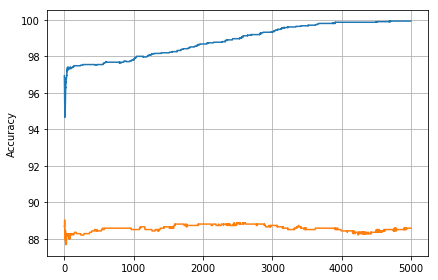

In [0]:
# steps_plot =  [step for step in range(0, num_steps, plot_every)]
# # plt.plot(steps_plot, 100*np.asarray(train_accuracy))
# # plt.plot(steps_plot, val_accuracy)

# plt.plot(steps_plot, savgol_filter(100*np.asarray(train_accuracy),3,1))  
# plt.plot(steps_plot, savgol_filter(np.asarray(val_accuracy),3,1))
# plt.tight_layout()
# # plt.xticks(np.arange(min(steps_plot), max(steps_plot)+1, 2000))
# plt.ylabel('Accuracy')
# plt.grid(abs)
# plt.show()
steps_plot =  [step for step in range(0, num_steps, plot_every)]
plt.plot(steps_plot, 100*np.asarray(train_accuracy))
plt.plot(steps_plot, val_accuracy)

# plt.plot(steps_plot, savgol_filter(100*np.asarray(train_accuracy),3,1))  
# plt.plot(steps_plot, savgol_filter(np.asarray(val_accuracy),3,1))
plt.tight_layout()
# plt.xticks(np.arange(min(steps_plot), max(steps_plot)+1, 2000))
plt.ylabel('Accuracy')
plt.grid(abs)
plt.show()

In [0]:
# valid_accuracy_filtered = savgol_filter(np.asarray(val_accuracy),3,1)
valid_accuracy_filtered = val_accuracy[5:]

# valid_accuracy_filtered = savgol_filter(np.asarray(val_accuracy),3,1)
print(max(valid_accuracy_filtered))
valid_accuracy_filtered_np = np.asarray(valid_accuracy_filtered)
print(np.argmax(valid_accuracy_filtered))
print(steps_plot[np.argmax(valid_accuracy_filtered)])
print(train_losses[5+np.argmax(valid_accuracy_filtered)])

88.88054
2445
2445
0.033881765


#### Now retrain on this appended test data till 1 steps


In [0]:
print(combined_train_valid.shape)
print(aside_valid_test.shape)

(4335, 36)
(100, 36)


In [0]:
train_valid_combined_shuffle_indices = np.random.permutation(train_valid_combined.shape[0])
train_valid_combined_shuffled = train_valid_combined[train_valid_combined_shuffle_indices,:]
validation_test_label_one_hot_shuffled = validation_test_label_one_hot[train_valid_combined_shuffle_indices,:]


In [0]:
# keep aside 
aside_examples= 400
aside_valid_test = train_valid_combined[-aside_examples:]
aside_valid_test_label = validation_test_label_one_hot[-aside_examples:]
combined_train_valid = train_valid_combined[:train_valid_combined.shape[0]-aside_examples,:]
combined_train_valid_label = validation_test_label_one_hot[:train_valid_combined.shape[0]-aside_examples,:]

In [0]:
# Reinitialize wt
## Define weights of the layer
# G_W1 = tf.Variable(np.float32(clf.coefs_[0]))
# G_b1 = tf.Variable(np.float32(clf.intercepts_ [0]))

# G_W2 =  tf.Variable(np.float32(clf.coefs_[1]))
# G_b2 = tf.Variable(np.float32(clf.intercepts_ [1]))


G_W1 = tf.Variable(xavier_init(clf.coefs_[0].shape))
G_b1 = tf.Variable(xavier_init(clf.intercepts_ [0].shape))

G_W2 =  tf.Variable(xavier_init(clf.coefs_[1].shape))
G_b2 = tf.Variable(xavier_init(clf.intercepts_ [1].shape))

num_hidden_neurons = 90
GwLoop = tf.Variable(xavier_init([output_shape,num_hidden_neurons]))
G_bLoop = tf.Variable(tf.zeros(shape=[num_hidden_neurons]))

GwLoop2 = tf.Variable(xavier_init([num_hidden_neurons,num_hidden_neurons]))
G_bLoop2 = tf.Variable(tf.zeros(shape=[num_hidden_neurons]))

GLossW = tf.Variable(xavier_init([output_shape,output_shape]))
GLossb= tf.Variable(tf.zeros(shape=[output_shape]))
saver = tf.train.Saver()

In [0]:
## Building the graph - Best!
saver = tf.train.Saver()
hid_neuron = [104]
num_steps = 5000
# num_steps = 20000

# batch_size = 200
batch_size = train_data.shape[0]

train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 100
best_accuracy_valid
learning_rate = 0.001


X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]



wLoss1 = 6
wLoss2 = 2
wLoss3 = 0
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for step in range(0, num_steps):
        if (step>2500):
          plot_every = 10
        batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % plot_every == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             train_accuracy.append(train_acc)
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
            
            train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
            train_accuracy.append(train_acc_total)
            train_losses.append(train_loss_total)
            print("step " + str(step) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
            validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
            print("ValidTest acc=",str(validationTest_accuracy), "%")
            if step%plot_every == 0:
              if (validationTest_accuracy >= best_accuracy_valid):
                best_accuracy_valid = validation_accuracy
                saver.save(sess, './statlog_letterAdam')
                G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
#         if(train_loss_total<0.033881765):
#           break
                                         
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    
    validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
    print("ValidTest acc=",str(validationTest_accuracy), "%")
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)
    saver.save(sess, './statlog_letterAdam')
    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    
    print("="*50)

step 0, training loss Total= 2.249485, training acc total= 10.111524164676666%
ValidTest acc= 2.0 %
step 100, training loss Total= 0.48414153, training acc total= 83.5192084312439%
ValidTest acc= 85.0 %
step 200, training loss Total= 0.375522, training acc total= 85.35315990447998%
ValidTest acc= 80.75 %
step 300, training loss Total= 0.3350746, training acc total= 86.34448647499084%
ValidTest acc= 80.0 %
step 400, training loss Total= 0.30637467, training acc total= 87.13754415512085%
ValidTest acc= 80.25 %
step 500, training loss Total= 0.28196496, training acc total= 87.65799403190613%
ValidTest acc= 80.0 %
step 600, training loss Total= 0.26231056, training acc total= 88.17843794822693%
ValidTest acc= 79.75 %
step 700, training loss Total= 0.24660839, training acc total= 88.69888186454773%
ValidTest acc= 79.75 %
step 800, training loss Total= 0.23350641, training acc total= 89.41759467124939%
ValidTest acc= 81.0 %
step 900, training loss Total= 0.22221144, training acc total= 89.83

In [0]:
train_valid_combined_shuffle_indices = np.random.permutation(train_valid_combined.shape[0])
train_valid_combined_shuffled = train_valid_combined[train_valid_combined_shuffle_indices,:]
validation_test_label_one_hot_shuffled = validation_test_label_one_hot[train_valid_combined_shuffle_indices,:]

In [0]:
# keep aside 
aside_examples= 400
aside_valid_test = train_valid_combined_shuffled[-aside_examples:]
aside_valid_test_label = validation_test_label_one_hot_shuffled[-aside_examples:]
combined_train_valid = train_valid_combined_shuffled[:train_valid_combined.shape[0]-aside_examples,:]
combined_train_valid_label = validation_test_label_one_hot_shuffled[:train_valid_combined.shape[0]-aside_examples,:]

In [0]:
y = (np.argmax(aside_valid_test_label,axis=1))
y

array([5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 2, 5, 5, 0, 5, 5,
       5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 0, 3,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

(array([965.,   0., 450.,   0., 892.,   0., 371.,   0., 421., 936.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

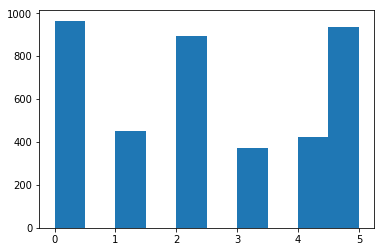

In [0]:
plt.hist(np.argmax(combined_train_valid_label,axis = 1))

(array([107.,   0.,  29.,   0.,  69.,   0.,  44.,   0.,  49., 102.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

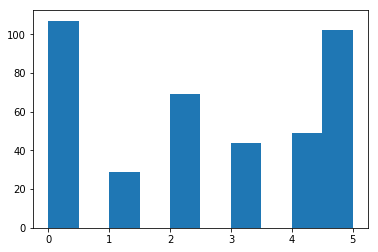

In [0]:
plt.hist(np.argmax(aside_valid_test_label,axis = 1))

In [0]:
## Building the graph - Best!
saver = tf.train.Saver()
hid_neuron = [104]
num_steps = 15000
# num_steps = 20000

# batch_size = 200
batch_size = train_data.shape[0]

train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 500
best_accuracy_valid
learning_rate = 0.001
track_step = []

X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]



wLoss1 = 6
wLoss2 = 2
wLoss3 = 0
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for step in range(0, num_steps):
        if (step>5000):
          plot_every = 10
        batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % plot_every == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             train_accuracy.append(train_acc)
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
            track_step.append(step)
            train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
            train_accuracy.append(train_acc_total)
            train_losses.append(train_loss_total)
            print("step " + str(step) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
            validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
            print("ValidTest acc=",str(validationTest_accuracy), "%")
            if step%plot_every == 0:
              if (validationTest_accuracy >= best_accuracy_valid):
                best_accuracy_valid = validation_accuracy
                saver.save(sess, './statlog_letterAdam')
                G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
#         if(train_loss_total<0.033881765):
#           break
                                         
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    
    validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
    print("ValidTest acc=",str(validationTest_accuracy), "%")
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)
#     saver.save(sess, './statlog_letterAdam')
    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    
    print("="*50)

step 0, training loss Total= 2.2215009, training acc total= 9.219330549240112%
ValidTest acc= 11.0 %
step 500, training loss Total= 0.2881687, training acc total= 87.38538026809692%
ValidTest acc= 83.0 %
step 1000, training loss Total= 0.21610025, training acc total= 90.23544192314148%
ValidTest acc= 85.25 %
step 1500, training loss Total= 0.17700866, training acc total= 91.5985107421875%
ValidTest acc= 86.25 %
step 2000, training loss Total= 0.15144627, training acc total= 92.56505370140076%
ValidTest acc= 86.75 %
step 2500, training loss Total= 0.13109908, training acc total= 93.25898289680481%
ValidTest acc= 87.5 %
step 3000, training loss Total= 0.11394577, training acc total= 94.29987668991089%
ValidTest acc= 87.75 %
step 3500, training loss Total= 0.09894013, training acc total= 95.34077048301697%
ValidTest acc= 87.5 %
step 4000, training loss Total= 0.08574314, training acc total= 95.9603488445282%
ValidTest acc= 87.75 %
step 4500, training loss Total= 0.07370351, training acc t

In [0]:
# keep aside 
aside_examples= 50
aside_valid_test = train_valid_combined_shuffled[-aside_examples:]
aside_valid_test_label = validation_test_label_one_hot_shuffled[-aside_examples:]
combined_train_valid = train_valid_combined_shuffled[:train_valid_combined.shape[0]-aside_examples,:]
combined_train_valid_label = validation_test_label_one_hot_shuffled[:train_valid_combined.shape[0]-aside_examples,:]

(array([14.,  0.,  3.,  0., 10.,  0.,  4.,  0., 12.,  7.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

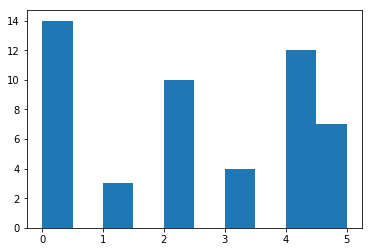

In [0]:
plt.hist(np.argmax(aside_valid_test_label,axis = 1))

In [0]:
## Building the graph - Best!
saver = tf.train.Saver()
hid_neuron = [104]
num_steps = 6340
# num_steps = 20000

# batch_size = 200
batch_size = train_data.shape[0]

train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 500
best_accuracy_valid
learning_rate = 0.001
track_step = []

X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]



wLoss1 = 6
wLoss2 = 2
wLoss3 = 0
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for step in range(0, num_steps):
        if (step>6000):
          plot_every = 10
        batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % plot_every == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             train_accuracy.append(train_acc)
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
            track_step.append(step)
            train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
            train_accuracy.append(train_acc_total)
            train_losses.append(train_loss_total)
            print("step " + str(step) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
            validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
            print("ValidTest acc=",str(validationTest_accuracy), "%")
#             if step%plot_every == 0:
#               if (validationTest_accuracy >= best_accuracy_valid):
#                 best_accuracy_valid = validation_accuracy

#         if(train_loss_total<0.033881765):
#           break
    saver.save(sess, './statlog_letterAdam2')
    G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])                                     
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    
    validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
    print("ValidTest acc=",str(validationTest_accuracy), "%")
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)
#     saver.save(sess, './statlog_letterAdam')
    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    
    print("="*50)

step 0, training loss Total= 2.2155166, training acc total= 9.395667165517807%
ValidTest acc= 8.0 %
step 500, training loss Total= 0.29402617, training acc total= 87.0467483997345%
ValidTest acc= 78.0 %
step 1000, training loss Total= 0.2238727, training acc total= 89.80615735054016%
ValidTest acc= 80.0 %
step 1500, training loss Total= 0.18729344, training acc total= 91.4709210395813%
ValidTest acc= 82.0 %
step 2000, training loss Total= 0.16092114, training acc total= 92.45153665542603%
ValidTest acc= 84.0 %
step 2500, training loss Total= 0.14030409, training acc total= 93.40934753417969%
ValidTest acc= 84.0 %
step 3000, training loss Total= 0.12369603, training acc total= 94.00228261947632%
ValidTest acc= 84.0 %
step 3500, training loss Total= 0.10983165, training acc total= 94.86886858940125%
ValidTest acc= 84.0 %
step 4000, training loss Total= 0.096315205, training acc total= 95.73546051979065%
ValidTest acc= 84.0 %
step 4500, training loss Total= 0.08433506, training acc total=

In [0]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    test_accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
    print("Test acc=",str(test_accuracy), "%")

INFO:tensorflow:Restoring parameters from ./statlog_letterAdam2
ValidValid acc= 84.0 %
Test acc= 90.35 %


## Hyperparameter tuning by splitting valid into two sets

In [0]:
# contd 

In [0]:
print(valid_validation_data.shape)
print(valid_test_data.shape)


(1000, 36)
(331, 36)


In [0]:

## Building the graph
# saver = tf.train.Saver()
# hid_neuron = [90]
num_steps = 30000
batch_size = 200
train_losses = []
test_acc = []
plot_every = 100
learning_rate = 0.001


X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
weights = {
    'h1': tf.Variable(np.float32(clf.coefs_[0])),
    'out': tf.Variable(np.float32(clf.coefs_[1]))
}
biases = {
    'b1': tf.Variable(np.float32(clf.intercepts_ [0])),
    'out': tf.Variable(np.float32(clf.intercepts_ [1]))
}
saver = tf.train.Saver()
W_track = []
ValidAccuracy_Track = []
ValidAccuracy_Test_track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]
    
for wL1 in range(1,7):
  for WL2 in range(1,wL1+1):
    for WL3 in range(0,2):

        wLoss1 = wL1
        wLoss2 = WL2
        wLoss3 = WL3
        loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
        loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
        loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

        loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

        train_op = optimizer.minimize(loss)
        correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

        ### Initialization and running the model
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            best_accuracy_valid = 0
            for step in range(0, num_steps):
                batch_x, batch_y = next_batch(batch_size, train_data, train_label_one_hot)
                sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
                if step % plot_every == 0:
                    train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
                    print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
                    train_losses.append(train_loss)
                    validation_accuracy = sess.run(accuracy*100, feed_dict={X: valid_validation_data,Y:valid_validation_data_label})
                    if step%plot_every == 0:
                      print("Validation Accuracy valid {} ...".format(validation_accuracy))
                      print()
                      if (validation_accuracy >= best_accuracy_valid):
                        best_accuracy_valid = validation_accuracy
                        saver.save(sess, './statlog_letterAdam')
                        G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
            print("Valid acc=",str(best_accuracy_valid), "%")
            ValidAccuracy_Track.append(best_accuracy_valid)
            this_params = G_W1np, G_b1np, G_W2np, G_b2np
            W_track.append(this_params)
            # code for checking accuracy of valid_test
            validation_test_accuracy = sess.run(accuracy*100, feed_dict={X: valid_test_data,Y:valid_test_data_label})
            ValidAccuracy_Test_track.append(validation_test_accuracy)
            print("Validation Accuracy Test {} ...".format(validation_test_accuracy))
            print("="*50)
            print("W1 = {} ...".format(wLoss1))
            print("W2 = {} ...".format(wLoss2))
            print("W3 = {} ...".format(wLoss3))

            print("*"*50)
            print("="*50)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

step 0, training loss= 1.3488517, training acc= 98.50000143051147%
Validation Accuracy valid 90.10000610351562 ...

step 100, training loss= 0.08567171, training acc= 97.50000238418579%
Validation Accuracy valid 89.9000015258789 ...

step 200, training loss= 0.059998617, training acc= 97.00000286102295%
Validation Accuracy valid 89.80000305175781 ...

step 300, training loss= 0.11387714, training acc= 98.00000190734863%
Validation Accuracy valid 89.80000305175781 ...

step 400, training loss= 0.080282405, training acc= 97.50000238418579%
Validation Accuracy valid 90.0 ...

step 500, training loss= 0.052642126, training acc= 98.50000143051147%
Validation Accuracy valid 89.70000457763672 ...

step 600, training loss= 0.08350072, training acc= 95.99999785423279%
Validation Accuracy valid 90.1000061035


### --
#### Valid acc= 98.5 %
#### Validation Accuracy Test 98.08917236328125 ...
==================================================
W1 = 5 ...
W2 = 4 ...
W3 = 0 ...
**************************************************
==================================================



## contd from above different start point

#### Hyperparameter tuning

In [0]:
max(ValidAccuracy_Track)

In [0]:
import matplotlib.pyplot as plt

In [0]:
plt.plot(ValidAccuracy_Track)
plt.plot(ValidAccuracy_Test_track)

plt.ylabel('Iter')
plt.grid(abs)
plt.show()

In [0]:
splt.plot(ValidAccuracy_Track)
plt.ylabel('Iter')
plt.grid(abs)
plt.show()

In [0]:
plt.hist([ValidAccuracy_Track],bins=30)
plt.ylabel('Frequency')
plt.show()

In [0]:
plt.plot(ValidAccuracy_Test_track)
plt.ylabel('Iter')
plt.grid(abs)
plt.show()

In [0]:
plt.hist([ValidAccuracy_Test_track],bins=30)
plt.ylabel('Frequency')
plt.show()